In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


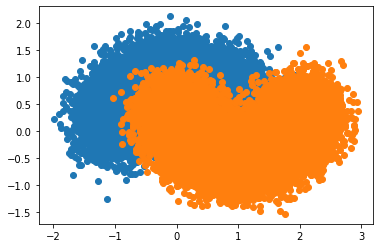

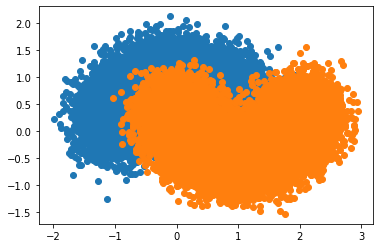

In [3]:
x,y=datasets.make_moons(n_samples=50000,noise=0.3,random_state=3)
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2)

In [5]:
from sklearn.linear_model import LogisticRegression
log_clf=LogisticRegression()
log_clf.fit(x_train,y_train)
log_clf.score(x_test,y_test)

0.85504

In [6]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(x_train,y_train)
svm_clf.score(x_test,y_test)

0.91384

In [7]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
dt_clf.score(x_test,y_test)


0.87472

In [8]:
y_predict1=log_clf.predict(x_test)
y_predict2=svm_clf.predict(x_test)
y_predict3=dt_clf.predict(x_test)
y_predict=np.array((y_predict1+y_predict2+y_predict3)>=2,dtype='int')
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.90456

In [9]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier(estimators=[('log_clf',LogisticRegression()),('svm_clf', SVC()),
    ('dt_clf', DecisionTreeClassifier())], voting='hard')
voting_clf.fit(x_train,y_train)
voting_clf.score(x_test,y_test)

0.9048

In [10]:
voting_clf2 = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),
    ('svm_clf', SVC(probability=True)),
    ('dt_clf', DecisionTreeClassifier())], voting='soft')
voting_clf2.fit(x_train, y_train)
voting_clf2.score(x_test, y_test)

0.90224

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bagging_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,
                              bootstrap=True,oob_score=True)
bagging_clf.fit(x_train,y_train)
bagging_clf.score(x_test,y_test)

0.91176

In [15]:
bagging_clf2=BaggingClassifier(DecisionTreeClassifier(),n_estimators=300,max_samples=100,
                              bootstrap=True,oob_score=True)
bagging_clf2.fit(x_train,y_train)
bagging_clf2.score(x_test,y_test)

0.91232

In [17]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                                max_samples=2000, bootstrap=True)
bagging_clf.fit(x_train, y_train)
bagging_clf.score(x_test, y_test)

Wall time: 9.3 s


0.91336

In [19]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=500, max_samples=2000,
                                bootstrap=True, n_jobs=-1)
bagging_clf.fit(x_train, y_train)
bagging_clf.score(x_test, y_test)

Wall time: 5.34 s


0.91288

In [21]:
random_subspaces_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,
                                       max_samples=500,oob_score=True,bootstrap=True,
                                       n_jobs=-1,max_features=1,bootstrap_features=True)
random_subspaces_clf.fit(x,y)
random_subspaces_clf.oob_score_

0.88844

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
%%time
rc_clf=RandomForestClassifier(n_estimators=500,random_state=2,oob_score=True,
                              n_jobs=-1)
rc_clf.fit(x,y)
print(rc_clf.oob_score_)

0.90352
Wall time: 28.8 s


In [29]:
%%time
rc_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=14,
                                 random_state=2,
                                 oob_score=True, n_jobs=-1)
rc_clf2.fit(x, y)
rc_clf2.oob_score_

Wall time: 20.3 s


0.90658

Wall time: 16.9 s


0.90658

In [30]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
%%time
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=500)
ada_clf.fit(x_train, y_train)
ada_clf.score(x_test, y_test)
#它默认用的也是决策树，增加了基分类器的数目后，准确率提升
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=500)
gb_clf.fit(x_train, y_train)
gb_clf.score(x_test, y_test)